# FRAUD Detection Classifier for Banking Transactions

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Data=pd.read_csv('C:/Users/user/Desktop/intellipaat/Projects/FraudDetection/creditcard.csv')

In [21]:
Data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [22]:
#Data[Data.Class==1]

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

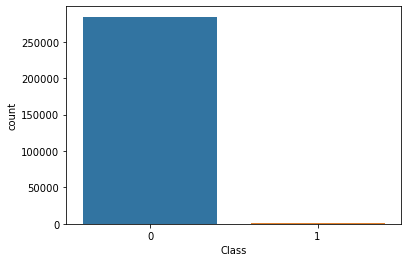

In [19]:
sns.countplot(Data['Class'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='V2', ylabel='Density'>

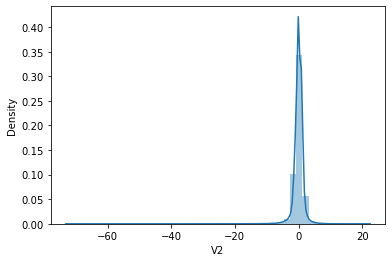

In [9]:
sns.distplot(Data['V2'])

<AxesSubplot:>

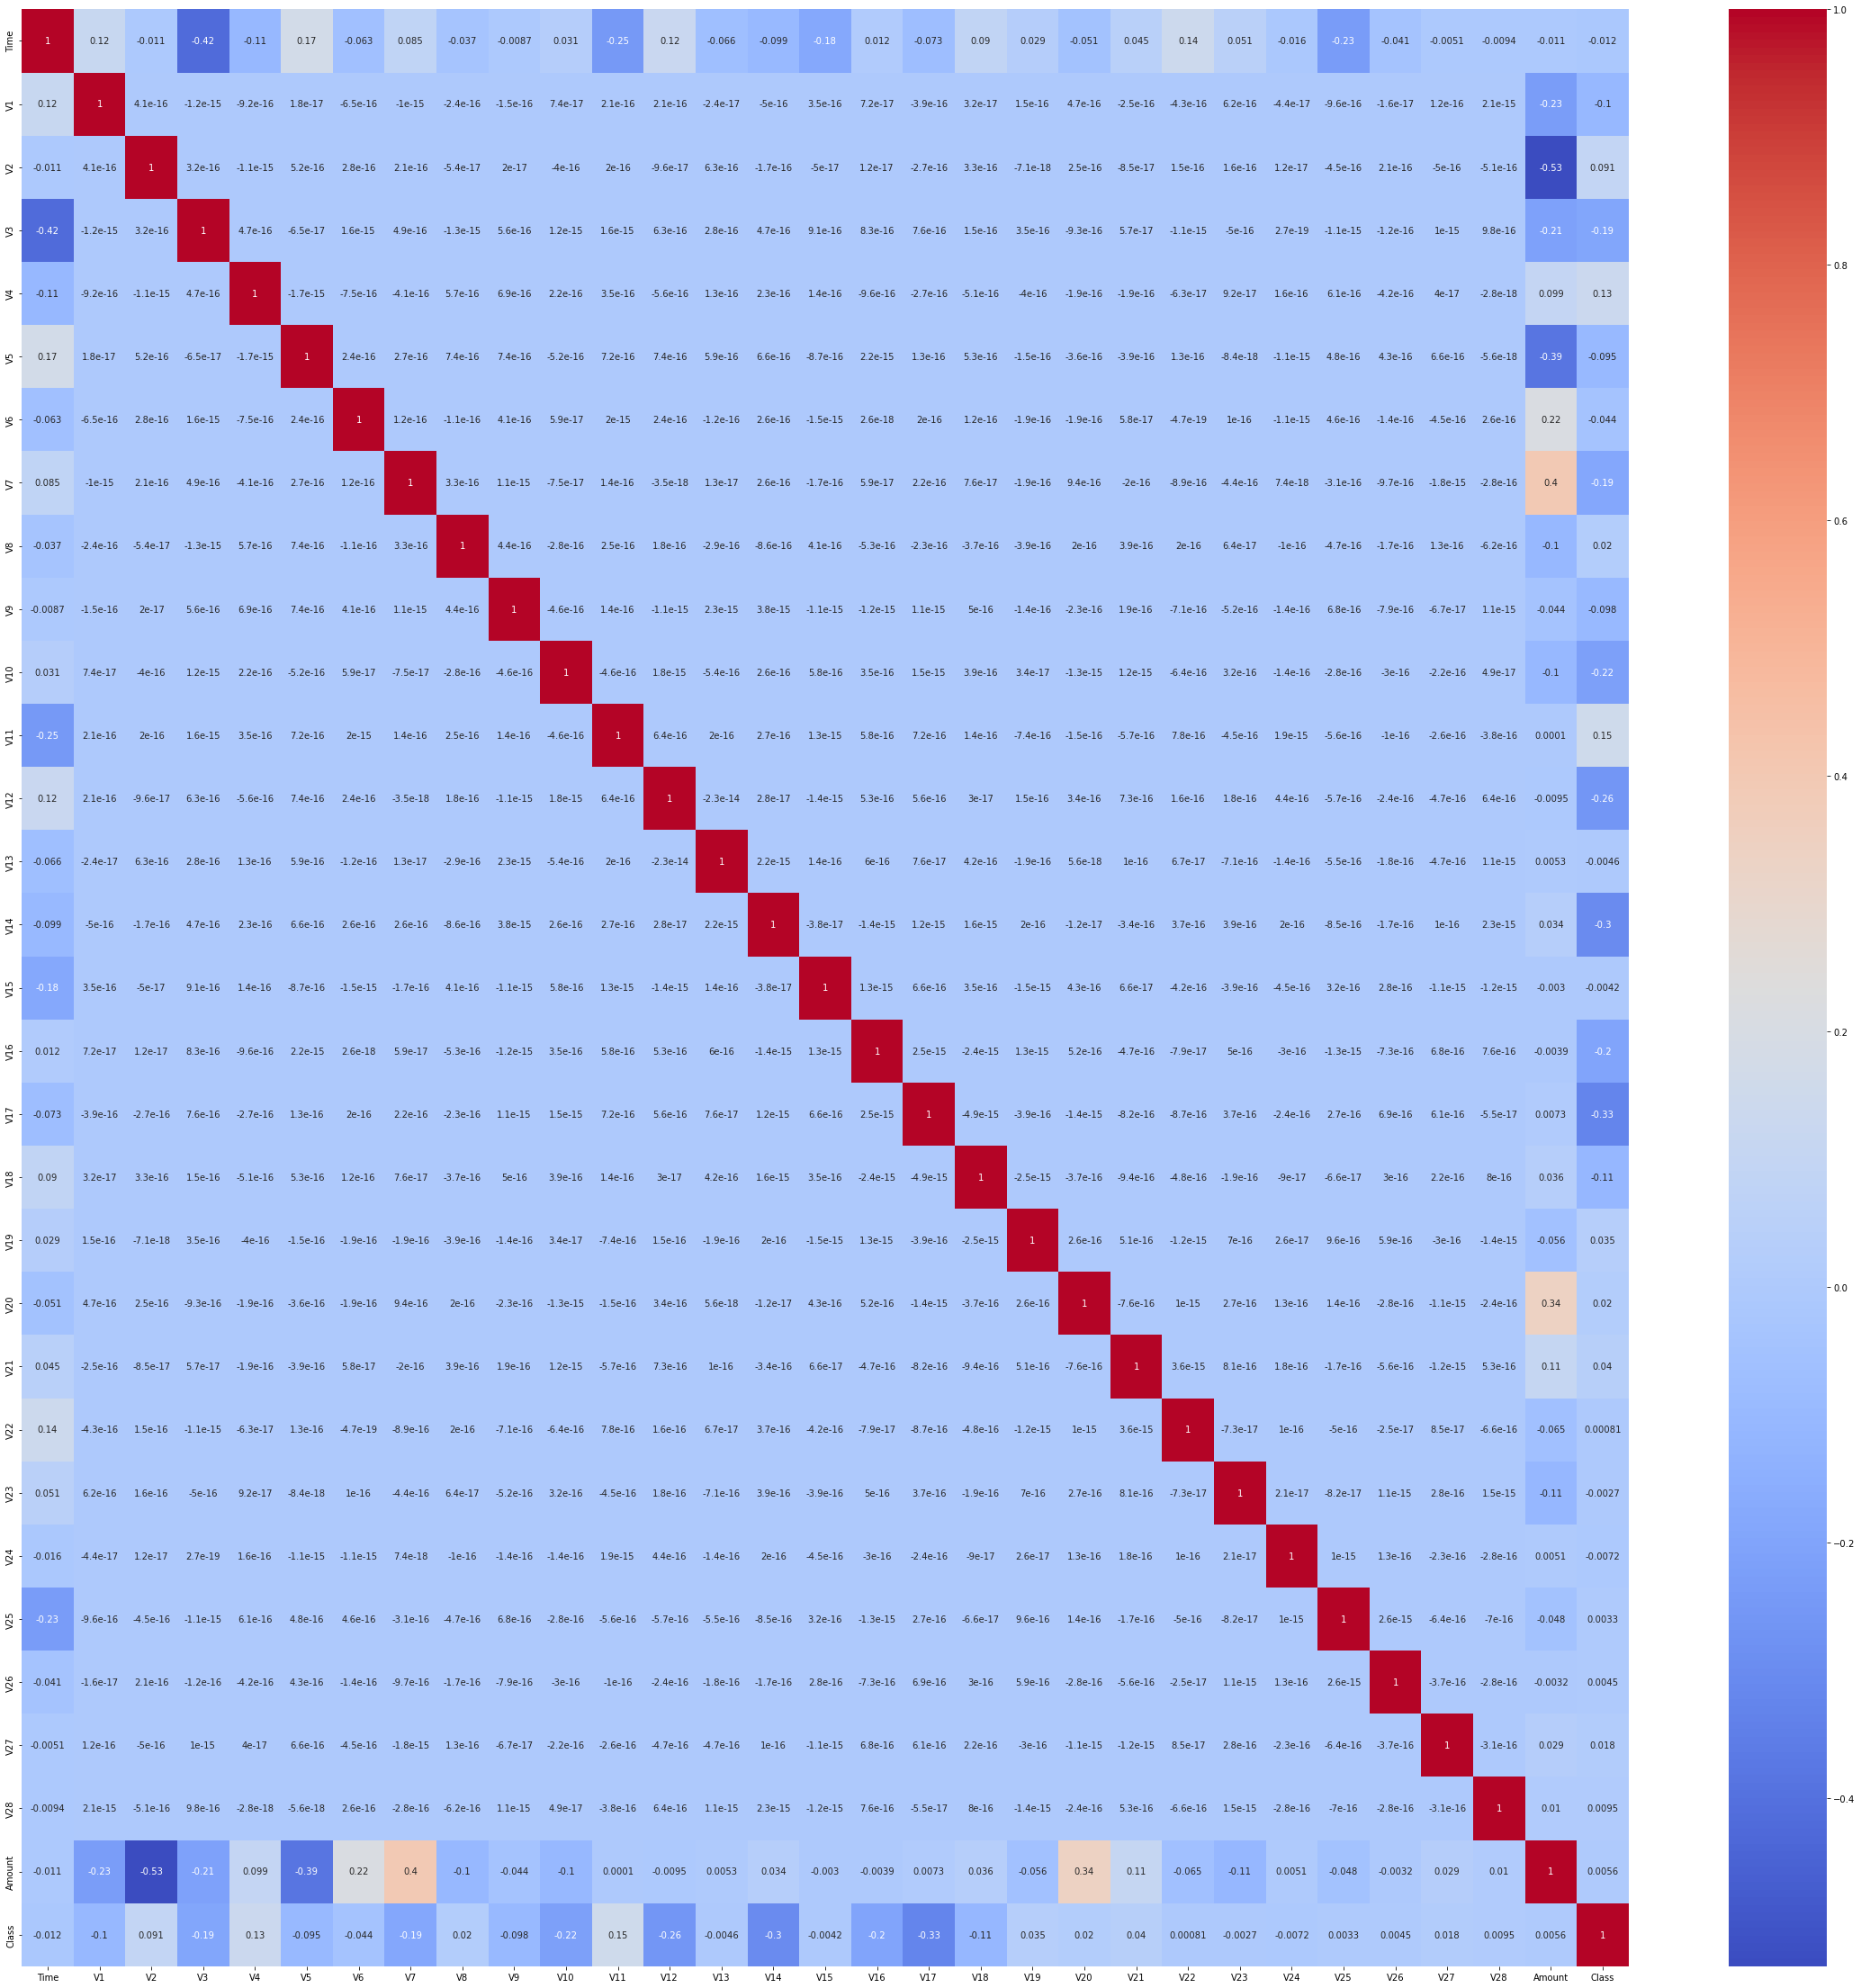

In [17]:
plt.figure(figsize=(40,40))
sns.heatmap(Data.corr(),annot=True,cmap='coolwarm')

In [ ]:
#since the data is pretty much masked by pca already, we can't find much info by doing EDA.

In [ ]:
#Moving on to scale the data since the range is different for each variable
#-By using a unbalanced/Biased data (count of frauds=499)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
x_std=scaler.fit_transform(Data.drop(labels='Class',axis=1))

In [28]:
y=Data['Class']

In [27]:
#train test split
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x_std,y,test_size=0.30,random_state=25)

In [30]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

In [31]:
Model_LogR=LogisticRegression()

In [32]:
Model_LogR.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_pred=Model_LogR.predict(x_test)

In [75]:
#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [35]:
confusion_matrix(y_test,y_pred)

array([[85275,    10],
       [   62,    96]], dtype=int64)

In [36]:
accuracy_score(y_test,y_pred)

0.9991573329588147

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85285
           1       0.91      0.61      0.73       158

    accuracy                           1.00     85443
   macro avg       0.95      0.80      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [37]:
#Trying to build the model by creating a balanced dataset

In [42]:
#No of records with classificaion as fraud
Data[Data.Class==1].V1.count()

492

In [48]:
#%age of records with classificaion as fraud
(len(Data[Data.Class==1].V1)/len(Data['Class']))*100

0.1727485630620034

In [ ]:
#It's only 0.17% of the entire class

In [49]:
Temp=Data[Data.Class==0]

In [51]:
Temp_r=Temp.sample(n=492,axis=0)

In [52]:
Temp_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 66897 to 119204
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    492 non-null    float64
 1   V1      492 non-null    float64
 2   V2      492 non-null    float64
 3   V3      492 non-null    float64
 4   V4      492 non-null    float64
 5   V5      492 non-null    float64
 6   V6      492 non-null    float64
 7   V7      492 non-null    float64
 8   V8      492 non-null    float64
 9   V9      492 non-null    float64
 10  V10     492 non-null    float64
 11  V11     492 non-null    float64
 12  V12     492 non-null    float64
 13  V13     492 non-null    float64
 14  V14     492 non-null    float64
 15  V15     492 non-null    float64
 16  V16     492 non-null    float64
 17  V17     492 non-null    float64
 18  V18     492 non-null    float64
 19  V19     492 non-null    float64
 20  V20     492 non-null    float64
 21  V21     492 non-null    float64


In [57]:
Temp_NF=Data[Data.Class==1]

In [61]:
Data_Bal=pd.concat([Temp_r,Temp_NF])

In [63]:
Data_Bal.reset_index()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,66897,52268.0,1.186594,0.585160,0.103621,2.383549,0.118333,-0.553260,0.350085,-0.040807,...,0.017025,-0.086635,-0.096437,0.295491,0.644628,0.056485,-0.054301,-0.003704,2.47,0
1,178816,123794.0,-0.565451,-0.517422,-0.123326,-0.270570,1.198575,-0.882160,0.781620,-0.283067,...,0.283158,1.240972,0.576767,-0.488070,-0.265460,-0.146576,-0.048595,-0.237884,26.00,0
2,136667,81813.0,-0.359169,1.091052,1.295152,0.071239,0.045890,-1.013605,0.667772,-0.058140,...,-0.264993,-0.707630,-0.012207,0.328825,-0.167288,0.072631,0.244056,0.098303,0.69,0
3,104991,69319.0,-1.501232,1.899735,0.735250,-0.195655,-0.278574,-1.066760,0.655871,0.005721,...,-0.431019,-0.848903,0.061393,0.292927,0.083594,0.097997,0.763369,0.436371,13.26,0
4,159071,112168.0,1.548740,-1.565719,0.174582,0.358569,-0.539409,3.015420,-1.782399,1.017446,...,0.249329,1.095604,0.057137,-0.880323,-0.397951,0.072424,0.117369,-0.027878,123.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [64]:
Data_Bal.Class.value_counts()

0    492
1    492
Name: Class, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

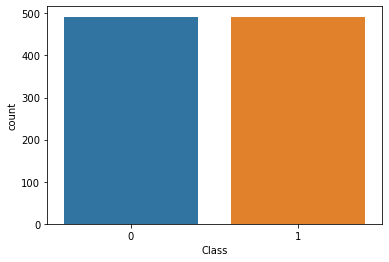

In [80]:
sns.countplot(Data_Bal.Class)

#from the above we can see that we have attained a balanced data set.

In [65]:
#LEt's move to creating the model again

In [67]:
x_std_n=scaler.fit_transform(Data_Bal.drop(labels='Class',axis=1))

In [68]:
y_n=Data_Bal['Class']

In [69]:
x_train_n,x_test_n,y_train_n,y_test_n=train_test_split(x_std_n,y_n,test_size=0.30,random_state=25)

In [70]:
Model_LogR=LogisticRegression()

In [71]:
Model_LogR.fit(x_train_n,y_train_n)

LogisticRegression()

In [72]:
y_pred_n=Model_LogR.predict(x_test_n)

In [73]:
confusion_matrix(y_test_n,y_pred_n)

array([[145,   3],
       [ 13, 135]], dtype=int64)

In [74]:
accuracy_score(y_test_n,y_pred_n)

0.9459459459459459

In [77]:
print(classification_report(y_test_n,y_pred_n))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       148
           1       0.98      0.91      0.94       148

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



In [ ]:
#Using Random Forest Algorithm

In [ ]:
#what is F1 Score

In [81]:
#using SMOTE to get the balanced class distribution